<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pandas-Data-Cleaning" data-toc-modified-id="Pandas-Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pandas Data Cleaning</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objectives</a></span><ul class="toc-item"><li><span><a href="#To-The-Center!" data-toc-modified-id="To-The-Center!-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>To The Center!</a></span></li><li><span><a href="#Using-Questions-to-Drive-Both-Exploration-and-Cleaning" data-toc-modified-id="Using-Questions-to-Drive-Both-Exploration-and-Cleaning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Using Questions to Drive Both Exploration and Cleaning</a></span></li><li><span><a href="#Question-1:-How-old-are-the-animals-in-our-dataset?" data-toc-modified-id="Question-1:-How-old-are-the-animals-in-our-dataset?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Question 1: How old are the animals in our dataset?</a></span><ul class="toc-item"><li><span><a href="#Handling-Missing-Data" data-toc-modified-id="Handling-Missing-Data-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Handling Missing Data</a></span></li><li><span><a href="#Map,-Apply-and-Applymap" data-toc-modified-id="Map,-Apply-and-Applymap-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Map, Apply and Applymap</a></span></li></ul></li><li><span><a href="#Question-2:-Are-Most-of-The-Animals-Already-Fixed?" data-toc-modified-id="Question-2:-Are-Most-of-The-Animals-Already-Fixed?-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Question 2: Are Most of The Animals Already Fixed?</a></span></li><li><span><a href="#A-Quick-Aside---for-Lambda-Functions!" data-toc-modified-id="A-Quick-Aside---for-Lambda-Functions!-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>A Quick Aside - for Lambda Functions!</a></span><ul class="toc-item"><li><span><a href="#One-More-Strategy:-Build-a-Missing-Indicator" data-toc-modified-id="One-More-Strategy:-Build-a-Missing-Indicator-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>One More Strategy: Build a Missing Indicator</a></span></li></ul></li><li><span><a href="#Comparing-Before-and-After" data-toc-modified-id="Comparing-Before-and-After-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Comparing Before and After</a></span></li></ul></li><li><span><a href="#Level-Up:-.applymap()" data-toc-modified-id="Level-Up:-.applymap()-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Level Up: <code>.applymap()</code></a></span></li><li><span><a href="#Level-Up:-Faster-NumPy-Methods" data-toc-modified-id="Level-Up:-Faster-NumPy-Methods-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Level Up: Faster NumPy Methods</a></span><ul class="toc-item"><li><span><a href="#NumPy's-where()-Method" data-toc-modified-id="NumPy's-where()-Method-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>NumPy's <code>where()</code> Method</a></span></li><li><span><a href="#NumPy's-select()-Method" data-toc-modified-id="NumPy's-select()-Method-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>NumPy's <code>select()</code> Method</a></span></li></ul></li></ul></div>

![panda](http://res.freestockphotos.biz/thumbs/3/3173-illustration-of-a-giant-panda-eating-bamboo-th.png)

# Pandas Data Cleaning

# Objectives

- Handle missing data, and recognize when different strategies for handling missing data would be appropriate
- Use DataFrame methods (and sometimes lambda functions) to transform data
- Use string methods to transform object-type columns

In [1]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## To The Center!

That's right - we're still working with Austin Animal Center data! But now, let's check out the Outcomes data, instead of the Intakes data we were working with before.

Data source: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238

In [2]:
# Read in the animal center outcomes data as df
# Can use parse_dates and pass a column name to read it as a datetime
df = pd.read_csv('data/Austin_Animal_Center_Outcomes_022822.csv',
                 parse_dates=['DateTime', 'Date of Birth'])

In [3]:
# Check it out
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [4]:
# Info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137097 entries, 0 to 137096
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         137097 non-null  object        
 1   Name              96095 non-null   object        
 2   DateTime          137097 non-null  datetime64[ns]
 3   MonthYear         137097 non-null  object        
 4   Date of Birth     137097 non-null  datetime64[ns]
 5   Outcome Type      137073 non-null  object        
 6   Outcome Subtype   62653 non-null   object        
 7   Animal Type       137097 non-null  object        
 8   Sex upon Outcome  137095 non-null  object        
 9   Age upon Outcome  137092 non-null  object        
 10  Breed             137097 non-null  object        
 11  Color             137097 non-null  object        
dtypes: datetime64[ns](2), object(10)
memory usage: 12.6+ MB


## Using Questions to Drive Both Exploration and Cleaning

The best way to think about how to both explore and clean your data set is to think about what is interesting in your data, what questions you have, what you want to know and how to actually get there. We're going to ask a few questions of our dataset, and use that to drive our 'cleaning' process (and talk a little bit about how and when to clean data in the process!)

## Question 1: How old are the animals in our dataset?

Let's try to answer this with the `Age upon Outcome` variable:

In [5]:
df['Age upon Outcome'].value_counts()

1 year       23780
2 years      21332
2 months     17063
3 years       8112
3 months      6685
1 month       5902
4 years       4765
4 months      4502
5 years       4413
5 months      3436
6 months      3329
6 years       2925
8 years       2551
7 years       2527
3 weeks       2331
2 weeks       2294
8 months      2177
10 years      2045
10 months     1988
4 weeks       1938
7 months      1777
9 months      1415
9 years       1410
1 weeks        995
12 years       995
11 months      869
11 years       801
1 week         748
13 years       656
14 years       441
3 days         399
2 days         389
15 years       369
1 day          316
6 days         263
4 days         250
0 years        207
5 days         167
16 years       163
5 weeks        152
17 years        92
18 years        56
19 years        27
20 years        21
-1 years         6
22 years         6
25 years         1
23 years         1
30 years         1
-2 years         1
-3 years         1
24 years         1
21 years    

Oh no! These aren't numbers! And the data is pretty dirty! Let's see how we can break this column apart, into the Age Number and the Age Unit.

In [8]:
# Split out the age number and age unit - using string methods!
df['Age Number'] = df['Age upon Outcome'].str.split().str[0]
df['Age Unit'] = df['Age upon Outcome'].str.split().str[1]

In [9]:
# Sanity check
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,years
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,year
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,year
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,months
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,days


In [10]:
# Check the data types really quick...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137097 entries, 0 to 137096
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         137097 non-null  object        
 1   Name              96095 non-null   object        
 2   DateTime          137097 non-null  datetime64[ns]
 3   MonthYear         137097 non-null  object        
 4   Date of Birth     137097 non-null  datetime64[ns]
 5   Outcome Type      137073 non-null  object        
 6   Outcome Subtype   62653 non-null   object        
 7   Animal Type       137097 non-null  object        
 8   Sex upon Outcome  137095 non-null  object        
 9   Age upon Outcome  137092 non-null  object        
 10  Breed             137097 non-null  object        
 11  Color             137097 non-null  object        
 12  Age Number        137092 non-null  object        
 13  Age Unit          137092 non-null  object        
dtypes: d

In [11]:
# Need to make our Age Number actual numbers! 
df['Age Number'].astype(int)

ValueError: cannot convert float NaN to integer

Alas! Nulls! Let's check out these null values:

In [13]:
# Check how many nulls we have in our original Age Upon Outcome column

df['Age Number'].isna().sum()
#df['Age Number'].isnull() is an alias

5

In [14]:
df.isna().sum()

Animal ID               0
Name                41002
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           24
Outcome Subtype     74444
Animal Type             0
Sex upon Outcome        2
Age upon Outcome        5
Breed                   0
Color                   0
Age Number              5
Age Unit                5
dtype: int64

### Handling Missing Data

A lot of the times we'll have missing information in our data set. This can sometimes be troublesome in what we're trying to do.

There are a few strategies we can choose from and they each have their pros/cons:

- **Fill with a Relevant Value**
    - If we know what the nulls 'should' be, easy to fill them with that value
    - For numbers, perhaps the null indicates a 0
    - Or, for string columns, might be easier to handle if we fill with "Missing" or "Unknown"
- **Fill with a Reasonable Value**
    - For numeric data, it might be acceptable to fill with a measure of central tendency (mean or median)
    - For categorical/string data, might be acceptable to fill with the most common (mode)
    - But beware! Filling in missing values can lead to you drawing incorrect conclusions. If most of the data from a column are missing, it's going to appear that the value you filled it in with is more common that it actually was!
- **Specify Missing Data**
    - If you plan to fill in missing values, it might make sense to specify that the data was originally missing by creating a new indicator column
    - This can be helpful when you suspect that the fact the data was missing could be important for an analysis.
- **Drop Missing Data**
    - While you should try to keep as much relevant data as possible, sometimes the other methods don't make as much sense and it's better to remove or **drop** the missing data
    - We typically drop missing data if very little data would be lost and/or trying to fill in the values wouldn't make sense for our use case



So: what should we do about the missing Age upon Outcome data?

<br>
<details>
    <summary>Possible Answer</summary>

- It's probably okay to drop the missing data in this case - not very many rows with nulls in that column
- Should look at the percentage of the total (aka what percentage of rows would be dropped) to justify this decision
    
    
Note! There is a Date of Birth column that does not have any nulls! But we're specifically trying to use Age Upon Outcome here because it helps us practice some other tactics for cleaning data.
    
</details>



In [19]:
# No matter what - better to make this change on a COPY of the dataframe
df_clean = df.copy()

In [20]:
# Code here to handle nulls
df_clean = df_clean.dropna(subset=['Age upon Outcome'])
#df_clean.dropna(subset=['Age upon Outcome'], inplace=True)

In [21]:
# Sanity check
df_clean.isna().sum()

Animal ID               0
Name                40999
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     74443
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        0
Breed                   0
Color                   0
Age Number              0
Age Unit                0
dtype: int64

In [22]:
# Cool - now we can make our Age Number column an integer
df_clean['Age Number'] = df_clean['Age Number'].astype(int)

In [23]:
# Sanity check
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137092 entries, 0 to 137096
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         137092 non-null  object        
 1   Name              96093 non-null   object        
 2   DateTime          137092 non-null  datetime64[ns]
 3   MonthYear         137092 non-null  object        
 4   Date of Birth     137092 non-null  datetime64[ns]
 5   Outcome Type      137069 non-null  object        
 6   Outcome Subtype   62649 non-null   object        
 7   Animal Type       137092 non-null  object        
 8   Sex upon Outcome  137091 non-null  object        
 9   Age upon Outcome  137092 non-null  object        
 10  Breed             137092 non-null  object        
 11  Color             137092 non-null  object        
 12  Age Number        137092 non-null  int32         
 13  Age Unit          137092 non-null  object        
dtypes: d

Now let's do something about those Age Values...

### Map, Apply and Applymap

Resource: https://www.geeksforgeeks.org/difference-between-map-applymap-and-apply-methods-in-pandas/

The `.map()` method applies a transformation to every entry in the Series. This transformation  "maps" each value from the Series to a new value. A transformation can be defined by a function, Series, or dictionary.

The `.apply()` method is similar to the `.map()` method for Series, but can only take in functions. 

The `.applymap()` method only works on DataFrames, and applies the same transformation to every element (cell) of that DataFrame.

In [24]:
df_clean['Age Unit'].value_counts()

years     53927
months    43241
year      23780
weeks      7710
month      5902
days       1468
week        748
day         316
Name: Age Unit, dtype: int64

In [25]:
# Providing this dictionary to capture age values in # days (not perfect)
age_vals = {
    'years': 365,
    'year': 365,
    'months': 30,
    'month': 30,
    'weeks': 7,
    'week': 7,
    'days': 1,
    'day': 1
}

In [26]:
# Now, how can we transform the Age Value column to capture these values?
df_clean['Age Unit'] = df_clean['Age Unit'].map(age_vals)

In [27]:
# Sanity check
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1


In [28]:
# Now, let's make a new Age in Days column!
df_clean['Age in Days'] = df_clean['Age Number'] * df_clean['Age Unit']

In [29]:
# Sanity check
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit,Age in Days
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,365
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6


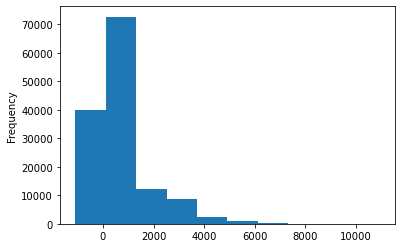

In [30]:
# Now we can visualize!
df_clean['Age in Days'].plot(kind='hist');

In [31]:
# Of course, we could also try...
# Use .dt.normalize on the DateTime column to access the date!
df_clean['Calculated Age'] = df_clean['DateTime'].dt.normalize() - df_clean['Date of Birth']

In [32]:
# Check it
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit,Age in Days,Calculated Age
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730,736 days
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365,371 days
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,1,365,365,366 days
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120,128 days
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6,6 days


## Question 2: Are Most of The Animals Already Fixed?

Let's use `.map()` to turn the Sex upon Outcome column into a category with three values: Fixed, Intact, or Unknown. 

In [33]:
# Check out what's currently in that column
df_clean['Sex upon Outcome'].value_counts()

Neutered Male    48299
Spayed Female    43578
Intact Male      17408
Intact Female    16904
Unknown          10902
Name: Sex upon Outcome, dtype: int64

In [34]:
# We can write a function for this
def fixed_mapper(status):
    '''
    Takes in the current status of animals and outputs whether they have been fixed
    '''
    if status in ['Neutered Male', 'Spayed Female']:
        return 'Fixed'
    elif status in ['Intact Male', 'Intact Female']:
        return 'Intact'
    else:
        return 'Unknown'

In [35]:
# Now let's use it!
df_clean['Grouped Sex'] = df_clean['Sex upon Outcome'].map(fixed_mapper)

In [36]:
# We had a null in that column before, did that change?
df_clean.isnull().sum()

Animal ID               0
Name                40999
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     74443
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        0
Breed                   0
Color                   0
Age Number              0
Age Unit                0
Age in Days             0
Calculated Age          0
Grouped Sex             0
dtype: int64

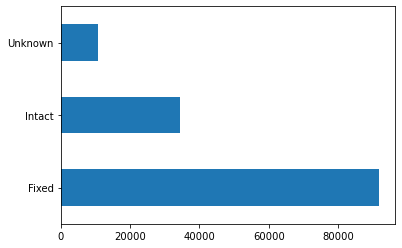

In [39]:
# Visualize it!
df_clean['Grouped Sex'].value_counts().plot(kind='barh');

## A Quick Aside - for Lambda Functions!

Simple functions can be defined just when you need them, when you would call the function. These are called **lambda functions**. These functions are **anonymous** and disappear immediately after use.

These can often be great as map transformation functions, but they can only do so much.

Let's use them to fill some nulls!

In [40]:
# Check which columns still have null values
df_clean.isna().sum()

Animal ID               0
Name                40999
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     74443
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        0
Breed                   0
Color                   0
Age Number              0
Age Unit                0
Age in Days             0
Calculated Age          0
Grouped Sex             0
dtype: int64

Let's look at Outcome Subtype - a lot of nulls, why do we think that is? What would be an appropriate strategy here?

<br>
<details>
    <summary>Possible Answer</summary>

- Might be that the Type doesn't have Subtypes, or that there hasn't been an outcome yet
- Would be appropriate to fill with N/A
    
</details>





In [41]:
# Let's try it!
# Note: need to use x is np.nan as our if condition
df_clean['Outcome Subtype'].map(lambda x: "N/A" if x is np.nan else x)

0             N/A
1             N/A
2             N/A
3             N/A
4         Partner
           ...   
137092        N/A
137093    Partner
137094     Foster
137095     Foster
137096        N/A
Name: Outcome Subtype, Length: 137092, dtype: object

In [42]:
# BUT! Pandas has a function for this
df_clean['Outcome Subtype'] = df_clean['Outcome Subtype'].fillna("N/A")
df_clean['Outcome Subtype']

0             N/A
1             N/A
2             N/A
3             N/A
4         Partner
           ...   
137092        N/A
137093    Partner
137094     Foster
137095     Foster
137096        N/A
Name: Outcome Subtype, Length: 137092, dtype: object

In [43]:
# We can use one of these methods to fill the nulls for Outcome Type too
# Explore the column here
df_clean['Outcome Type'].unique()

array(['Rto-Adopt', 'Adoption', 'Euthanasia', 'Transfer',
       'Return to Owner', 'Died', 'Disposal', 'Missing', 'Relocate', nan],
      dtype=object)

In [44]:
# Fill nulls here
df_clean['Outcome Type'] = df_clean['Outcome Type'].fillna("Unknown")

In [45]:
# Sanity Check
df_clean.isna().sum()

Animal ID               0
Name                40999
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type            0
Outcome Subtype         0
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        0
Breed                   0
Color                   0
Age Number              0
Age Unit                0
Age in Days             0
Calculated Age          0
Grouped Sex             0
dtype: int64

### One More Strategy: Build a Missing Indicator

While this doesn't directly answer a question we have, let's go ahead and build a new column to indicate where Name is null (just to demo).

This can be quite useful when modeling, if the data being missing actually means something!

In [46]:
# Quick pandas method for this
df_clean['Name Missing'] = df_clean['Name'].isna()

Might be more interesting to build an indicator of where "Mix" is in the Breed column

In [48]:
# Let's do it
#df_clean['Breed'].value_counts()
df_clean['Mix Indicator'] = df_clean['Breed'].str.lower().str.contains('Mix')

In [49]:
# Sanity check
df_clean.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit,Age in Days,Calculated Age,Grouped Sex,Name Missing,Mix Indicator
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,N/A,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730,736 days,Fixed,False,True
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,N/A,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365,371 days,Fixed,False,True
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,N/A,Other,Unknown,1 year,Raccoon,Gray,1,365,365,366 days,Unknown,True,False
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,N/A,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120,128 days,Fixed,False,False
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6,6 days,Intact,True,True


## Comparing Before and After

We can now see all the work we did!

In [50]:
# Original data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137097 entries, 0 to 137096
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         137097 non-null  object        
 1   Name              96095 non-null   object        
 2   DateTime          137097 non-null  datetime64[ns]
 3   MonthYear         137097 non-null  object        
 4   Date of Birth     137097 non-null  datetime64[ns]
 5   Outcome Type      137073 non-null  object        
 6   Outcome Subtype   62653 non-null   object        
 7   Animal Type       137097 non-null  object        
 8   Sex upon Outcome  137095 non-null  object        
 9   Age upon Outcome  137092 non-null  object        
 10  Breed             137097 non-null  object        
 11  Color             137097 non-null  object        
 12  Age Number        137092 non-null  object        
 13  Age Unit          137092 non-null  object        
dtypes: d

In [51]:
# Missing data cleaned
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137092 entries, 0 to 137096
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   Animal ID         137092 non-null  object         
 1   Name              96093 non-null   object         
 2   DateTime          137092 non-null  datetime64[ns] 
 3   MonthYear         137092 non-null  object         
 4   Date of Birth     137092 non-null  datetime64[ns] 
 5   Outcome Type      137092 non-null  object         
 6   Outcome Subtype   137092 non-null  object         
 7   Animal Type       137092 non-null  object         
 8   Sex upon Outcome  137091 non-null  object         
 9   Age upon Outcome  137092 non-null  object         
 10  Breed             137092 non-null  object         
 11  Color             137092 non-null  object         
 12  Age Number        137092 non-null  int32          
 13  Age Unit          137092 non-null  int64    

# Level Up: `.applymap()`

`.applymap()` is used to apply a transformation to each element of a DataFrame.

In [52]:
# This line will apply the base `type()` function to 
# all entries of the DataFrame.

df.applymap(type).head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit
0,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
1,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
2,<class 'str'>,<class 'float'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
3,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
4,<class 'str'>,<class 'float'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


# Level Up: Faster NumPy Methods

In general, `np.where()` and `np.select()` are faster than `map()`. This won't matter too much with reasonably-sized data but can be a consideration for ***big data***.

In [53]:
# Let's copy the dataframe to play around with
level_up = df_clean.copy()

In [54]:
level_up.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit,Age in Days,Calculated Age,Grouped Sex,Name Missing,Mix Indicator
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,N/A,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730,736 days,Fixed,False,True
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,N/A,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365,371 days,Fixed,False,True
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,N/A,Other,Unknown,1 year,Raccoon,Gray,1,365,365,366 days,Unknown,True,False
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,N/A,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120,128 days,Fixed,False,False
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6,6 days,Intact,True,True


## NumPy's `where()` Method

In [55]:
# First pass a condition
level_up['Adopted1'] = np.where(level_up['Outcome Type'] == 'Adoption',
                                True,  # What to fill with if the condition is true
                                False)  # What to fill with if not true
level_up.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit,Age in Days,Calculated Age,Grouped Sex,Name Missing,Mix Indicator,Adopted1
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,N/A,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,365,730,736 days,Fixed,False,True,False
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,N/A,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,365,365,371 days,Fixed,False,True,True
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,N/A,Other,Unknown,1 year,Raccoon,Gray,1,365,365,366 days,Unknown,True,False,False
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,N/A,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,30,120,128 days,Fixed,False,False,True
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6,1,6,6 days,Intact,True,True,False


In [56]:
level_up['Adopted2'] = level_up['Outcome Type'].map(lambda x: True if x == 'Adoption' else False)
level_up.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,...,Color,Age Number,Age Unit,Age in Days,Calculated Age,Grouped Sex,Name Missing,Mix Indicator,Adopted1,Adopted2
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,N/A,Cat,Neutered Male,2 years,...,Brown Tabby/White,2,365,730,736 days,Fixed,False,True,False,False
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,N/A,Dog,Neutered Male,1 year,...,White/Brown,1,365,365,371 days,Fixed,False,True,True,True
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,N/A,Other,Unknown,1 year,...,Gray,1,365,365,366 days,Unknown,True,False,False,False
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,N/A,Dog,Neutered Male,4 months,...,Buff,4,30,120,128 days,Fixed,False,False,True,True
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,...,Orange Tabby,6,1,6,6 days,Intact,True,True,False,False


In [57]:
# Let's time how long it takes np.where() to run by running it multiple times
%timeit np.where(level_up['Outcome Type'] == 'Adoption', True, False)

7.56 ms ± 30 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [58]:
# Let's time how long it takes .map() to run by running it multiple times
%timeit level_up['Outcome Type'].map(lambda x: True if x == 'Adoption' else False)

19.7 ms ± 48.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## NumPy's `select()` Method

Again, `numpy` will be faster:

In [62]:
# Define our list of conditions
conditions = [level_up['Sex upon Outcome'] == 'Neutered Male',
              level_up['Sex upon Outcome'] == 'Spayed Female',
              level_up['Sex upon Outcome'] == 'Intact Male',
              level_up['Sex upon Outcome'] == 'Intact Female',
              level_up['Sex upon Outcome'] == 'Unknown',
              level_up['Sex upon Outcome'].isna()]

# Define a matching list of outcomes
choices = ['Fixed', 'Fixed', 'Intact', 'Intact', 'Unknown', 'Unknown']

In [63]:
# Use np.select
level_up['Grouped Sex upon Outcome1'] = np.select(conditions, choices)
level_up['Grouped Sex upon Outcome1']

0           Fixed
1           Fixed
2         Unknown
3           Fixed
4          Intact
           ...   
137092     Intact
137093      Fixed
137094      Fixed
137095      Fixed
137096      Fixed
Name: Grouped Sex upon Outcome1, Length: 137092, dtype: object

In [65]:
# Check we got the same results with np.where()
(level_up['Grouped Sex upon Outcome1'] != level_up['Grouped Sex upon Outcome1']).sum()

0

In [66]:
# Let's time how long it takes .map() to run by running it multiple times
%timeit level_up['Sex upon Outcome'].map(fixed_mapper)

22.9 ms ± 375 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
# Let's time how long it takes np.select() to run by running it multiple times
%timeit np.select(conditions, choices)

3.96 ms ± 54.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
